<a href="https://colab.research.google.com/github/Serurays/Features_Driving_California_Housing_Prices/blob/main/Features_Driving_Californian_House_Values_Linear_Regression_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("camnugent/california-housing-prices")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/camnugent/california-housing-prices/versions/1


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
filepath = "/root/.cache/kagglehub/datasets/camnugent/california-housing-prices/versions/1/housing.csv"

data = pd.read_csv(filepath)
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [ ]:
data.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
data["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [ ]:
# missing data analysis
missing_values = data.isnull().sum()

missing_percentage = (missing_values / len(data)) * 100

print(missing_values)
print(missing_percentage)

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64
longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        1.002907
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64


In [ ]:
data_cleaned = data.dropna()

In [ ]:
print(data_cleaned.isnull().sum())

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


In [ ]:
data_cleaned.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


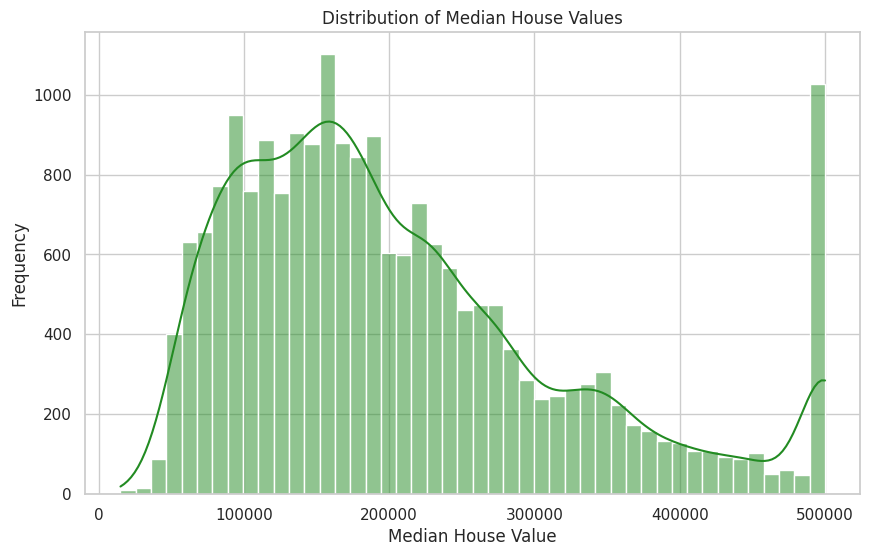

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned["median_house_value"], color="forestgreen", kde=True)
plt.title("Distribution of Median House Values")
plt.xlabel("Median House Value")
plt.ylabel("Frequency")
plt.show()

In [ ]:
Q1 = data_cleaned["median_house_value"].quantile(0.25)
Q3 = data_cleaned["median_house_value"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data_no_outliers_1 = data_cleaned[(data_cleaned["median_house_value"] > lower_bound) & (data_cleaned["median_house_value"] < upper_bound)]

print(data_cleaned.shape)
print(data_no_outliers_1.shape)

(20433, 10)
(19369, 10)


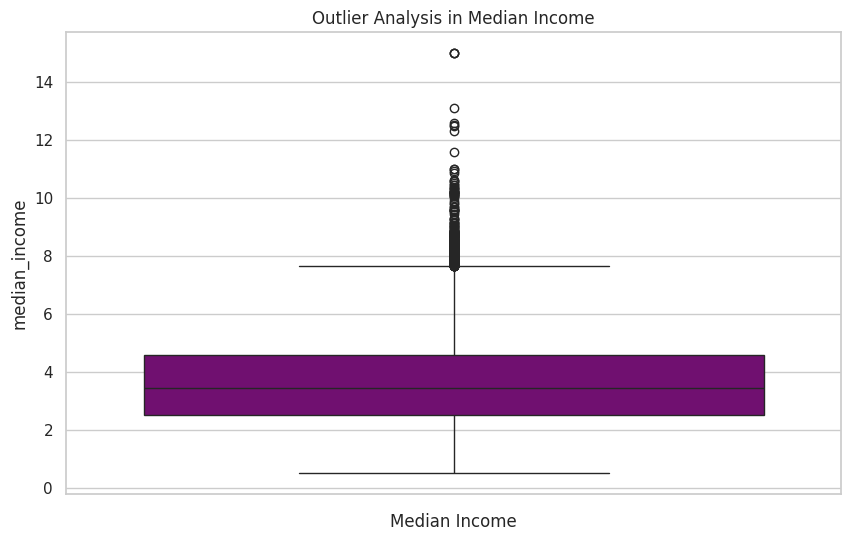

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data_no_outliers_1['median_income'], color="purple")
plt.title("Outlier Analysis in Median Income")
plt.xlabel("Median Income")
plt.show()

In [ ]:
Q1 = data_no_outliers_1["median_income"].quantile(0.25)
Q3 = data_no_outliers_1["median_income"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data_no_outliers_2 = data_no_outliers_1[(data_no_outliers_1["median_income"] > lower_bound) & (data_no_outliers_1["median_income"] < upper_bound)]

print(data_no_outliers_1.shape)
print(data_no_outliers_2.shape)

(19369, 10)
(19026, 10)


In [ ]:
data = data_no_outliers_2

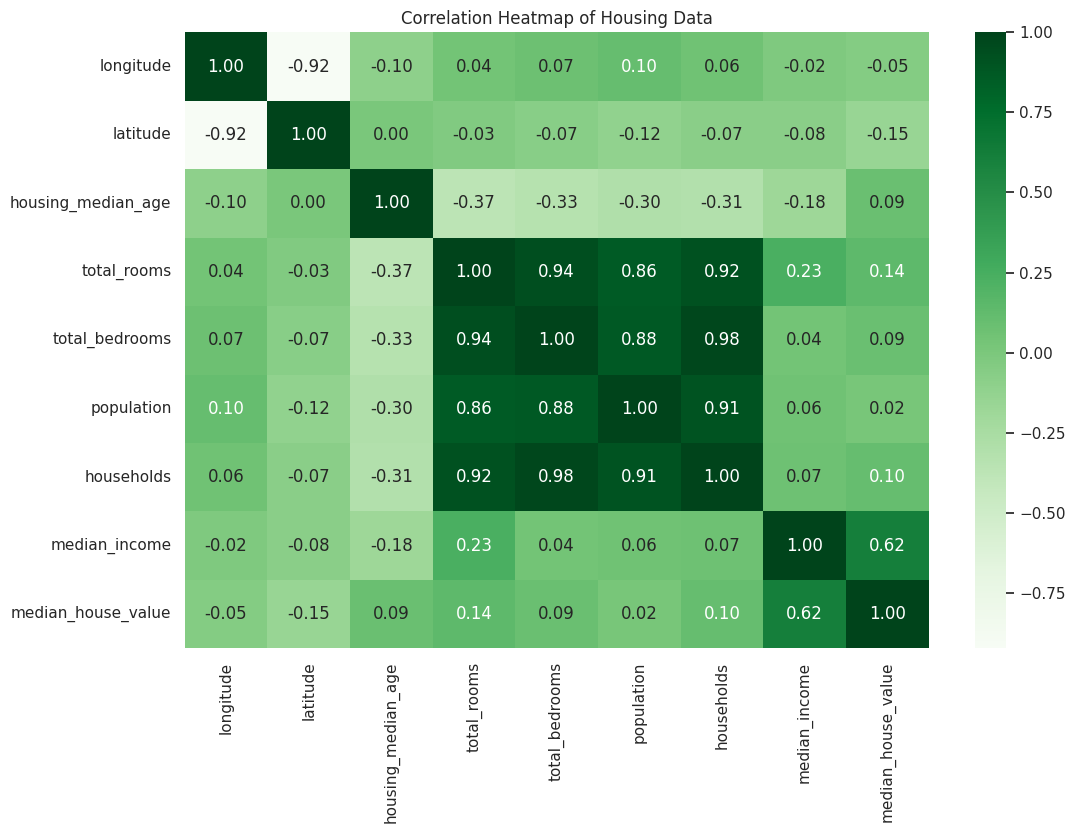

In [ ]:
numerical_data = data.select_dtypes(include=["number"])
correlation_matrix = numerical_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="Greens", fmt=".2f")
plt.title("Correlation Heatmap of Housing Data")
plt.show()

In [ ]:
data = data.drop("total_bedrooms", axis=1)

In [ ]:
for column in ["ocean_proximity"]:
  print(f"Unique values in {column}:", data[column].unique())

Unique values in ocean_proximity: ['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']


In [ ]:
ocean_proximity_dummies = pd.get_dummies(data["ocean_proximity"], prefix="ocean_proximity", dtype=int)
data = pd.concat([data.drop("ocean_proximity", axis=1), ocean_proximity_dummies], axis=1)
ocean_proximity_dummies

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
5,0,0,0,1,0
6,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


In [ ]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income', 'median_house_value',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [ ]:
data.drop("ocean_proximity_ISLAND", axis=1, inplace=True)
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income', 'median_house_value',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [ ]:
features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
            'population', 'households', 'median_income',
            'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
            'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN']

target = ['median_house_value']

X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1111)

print(f"Training test size: {X_train.shape[0]} samples")
print(f"Testing test size: {X_test.shape[0]} samples")

Training test size: 15220 samples
Testing test size: 3806 samples


In [ ]:
X_train

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
15578,-116.90,33.03,11.0,3213.0,1975.0,579.0,3.4750,1,0,0,0
1656,-121.93,37.89,13.0,2085.0,852.0,264.0,7.3445,0,1,0,0
9190,-118.35,34.32,52.0,102.0,54.0,32.0,1.9875,1,0,0,0
11839,-120.95,39.93,26.0,2023.0,922.0,365.0,2.8125,0,1,0,0
12267,-116.91,33.75,13.0,10886.0,4266.0,1955.0,2.3169,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
15355,-117.32,33.25,7.0,8206.0,4399.0,1423.0,3.6301,1,0,0,0
9608,-120.51,37.29,20.0,4927.0,4205.0,1009.0,1.7679,0,1,0,0
12606,-121.49,38.50,32.0,2364.0,1331.0,449.0,3.3190,0,1,0,0
2907,-119.03,35.37,52.0,1503.0,554.0,277.0,1.6786,0,1,0,0


In [ ]:
X_train_const = sm.add_constant(X_train)

model_fitted = sm.OLS(y_train, X_train_const).fit()

print(model_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     1973.
Date:                Tue, 17 Dec 2024   Prob (F-statistic):               0.00
Time:                        20:18:54   Log-Likelihood:            -1.8879e+05
No. Observations:               15220   AIC:                         3.776e+05
Df Residuals:                   15208   BIC:                         3.777e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [ ]:
X_train_const

,const,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
15578,1.0,-116.90,33.03,11.0,3213.0,1975.0,579.0,3.4750,1,0,0,0
1656,1.0,-121.93,37.89,13.0,2085.0,852.0,264.0,7.3445,0,1,0,0
9190,1.0,-118.35,34.32,52.0,102.0,54.0,32.0,1.9875,1,0,0,0
11839,1.0,-120.95,39.93,26.0,2023.0,922.0,365.0,2.8125,0,1,0,0
12267,1.0,-116.91,33.75,13.0,10886.0,4266.0,1955.0,2.3169,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15355,1.0,-117.32,33.25,7.0,8206.0,4399.0,1423.0,3.6301,1,0,0,0
9608,1.0,-120.51,37.29,20.0,4927.0,4205.0,1009.0,1.7679,0,1,0,0
12606,1.0,-121.49,38.50,32.0,2364.0,1331.0,449.0,3.3190,0,1,0,0
2907,1.0,-119.03,35.37,52.0,1503.0,554.0,277.0,1.6786,0,1,0,0


In [ ]:
X_test_const = sm.add_constant(X_test)

test_predictions = model_fitted.predict(X_test_const)

In [ ]:
test_predictions

,0
7322,153414.201880
465,239312.044180
12768,70054.781175
2617,189568.171319
13351,184267.795032
...,...
11691,171568.742378
1454,215893.783794
7360,129935.765388
19118,232846.312809


# **OLS Assumptions**

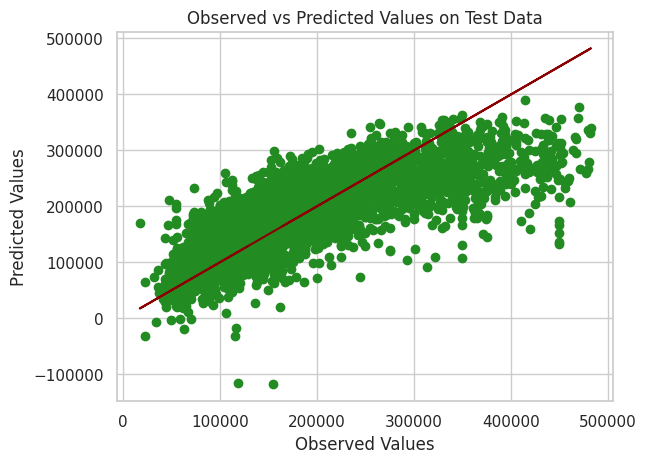

In [ ]:
# Linearity

plt.scatter(y_test, test_predictions, color="forestgreen")
plt.xlabel("Observed Values")
plt.ylabel("Predicted Values")
plt.title("Observed vs Predicted Values on Test Data")
plt.plot(y_test, y_test, color="darkred")
plt.show()

In [ ]:
# Random Sample
mean_residuals = np.mean(model_fitted.resid)

print(f"The mean of the residuals is {np.round(mean_residuals, 2)}")

The mean of the residuals is 0.0


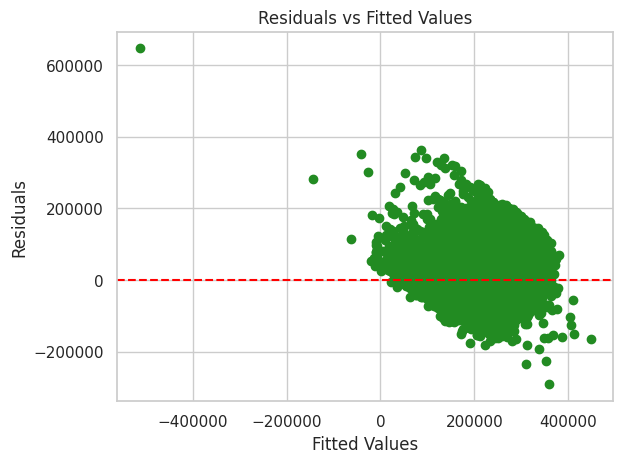

In [ ]:
plt.scatter(model_fitted.fittedvalues, model_fitted.resid, color="forestgreen")
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values")
plt.show()

In [ ]:
# Exogeneity

residuals = model_fitted.resid

for column in X_train.columns:
  corr_coefficient = np.corrcoef(X_train[column], residuals)[0, 1]
  print(f"Correlation between residuals and {column}: {np.round(corr_coefficient, 2)}")

Correlation between residuals and longitude: -0.0
Correlation between residuals and latitude: 0.0
Correlation between residuals and housing_median_age: -0.0
Correlation between residuals and total_rooms: 0.0
Correlation between residuals and population: 0.0
Correlation between residuals and households: 0.0
Correlation between residuals and median_income: 0.0
Correlation between residuals and ocean_proximity_<1H OCEAN: -0.0
Correlation between residuals and ocean_proximity_INLAND: 0.0
Correlation between residuals and ocean_proximity_NEAR BAY: -0.0
Correlation between residuals and ocean_proximity_NEAR OCEAN: 0.0


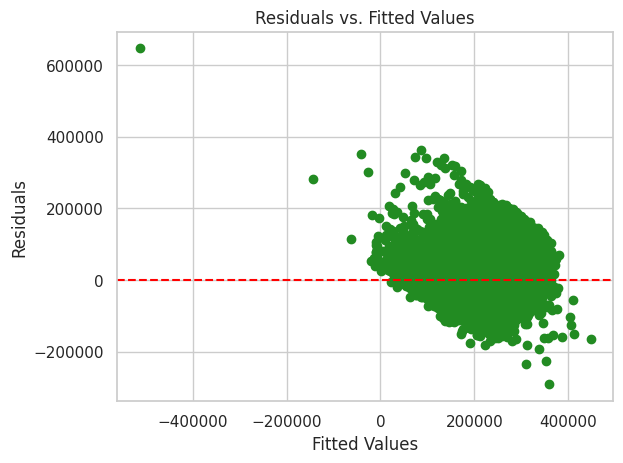

In [ ]:
# Heteroskedasticity
plt.scatter(model_fitted.fittedvalues, model_fitted.resid, color = "forestgreen")
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fitted Values")
plt.show()

# Since we have heteroskedasticity, consider using GLS, FGLS, GMM, etc.

# **Scikit-learn**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.fit_transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt

lr = LinearRegression()

lr.fit(X_train_scaled, y_train)

y_pred = lr.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)

rmse = sqrt(mse)

print(f"MSE on Test Set: {mse}")
print(f"RMSE on Test Set: {rmse}")

MSE on Test Set: 3527427465.5495896
RMSE on Test Set: 59392.14986468826
